<a href="https://colab.research.google.com/github/MarkusDarkus/Data_Analytics/blob/Test_tasks/DS_Competition_Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [831]:
import numpy as np
import pandas as pd


In [832]:
df=pd.read_csv("/content/train (1).csv")
dft=pd.read_csv("/content/test.csv")

In [833]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

KeyError: ignored

In [799]:
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [800]:
df=df.drop(columns=["PassengerId"])
dft=dft.drop(columns=["PassengerId"])

In [801]:
df["Sex"]=df["Sex"].replace("male",1)
df["Sex"]=df["Sex"].replace("female",0)
dft["Sex"]=dft["Sex"].replace("male",1)
dft["Sex"]=dft["Sex"].replace("female",0)

In [802]:
df["Age"].isnull().sum()

177

In [803]:
df["Age"].mean()

29.69911764705882

<Axes: ylabel='Frequency'>

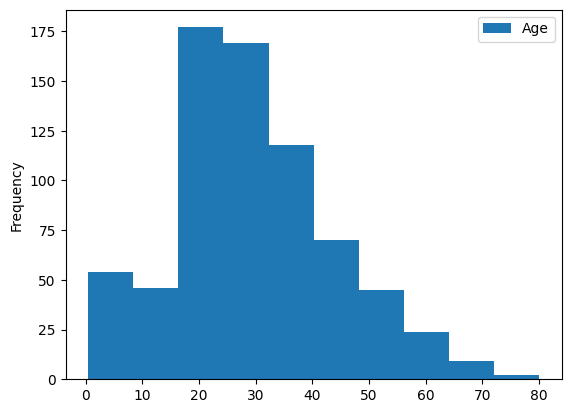

In [804]:
df.plot(y="Age", kind="hist")

In [805]:
df["Age"]=df["Age"].fillna(29.69911764705882)
dft["Age"]=dft["Age"].fillna(29.69911764705882)

In [806]:
df["Age"].isnull().sum()
df=df.drop(columns=["Cabin"])
dft=dft.drop(columns=["Cabin"])
dft.Fare.mean()

35.627188489208635

In [807]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: ylabel='Frequency'>

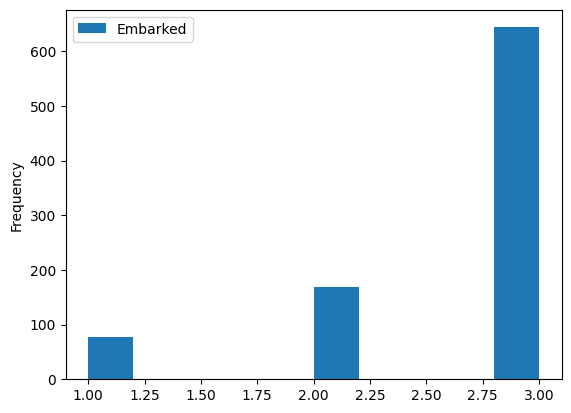

In [808]:
df["Embarked"]=df["Embarked"].replace("S",3)
df["Embarked"]=df["Embarked"].replace("C",2)
df["Embarked"]=df["Embarked"].replace("Q",1)
dft["Embarked"]=dft["Embarked"].replace("S",3)
dft["Embarked"]=dft["Embarked"].replace("C",2)
dft["Embarked"]=dft["Embarked"].replace("Q",1)
df.plot(y="Embarked", kind="hist")

In [809]:
df["Embarked"]=df["Embarked"].fillna(3)
dft["Embarked"]=dft["Embarked"].fillna(3)
dft["Fare"]=dft["Fare"].fillna(35.627188489208635)

In [810]:
dft.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [811]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked    float64
dtype: object

In [812]:
df=df.drop(columns=["Ticket"])
dft=dft.drop(columns=["Ticket"])

In [813]:
y=df["Survived"]
X=df.drop(columns=["Survived","Name"])

Xt=dft.drop(columns=["Name"])

In [814]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)
scaler.fit_transform(Xt)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=42)


In [815]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_auc_score,recall_score,precision_score

In [816]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"  f1_score ---> {f1_score(y_test,y_pred)}")
print(f"  precision_score ---> {precision_score(y_test,y_pred)}")
print(f"  recall_score ---> {recall_score(y_test,y_pred)}")
print(f"  roc_auc_score ---> {roc_auc_score(y_test,y_pred)}")
print(f"  score ---> {model.score(X_test,y_test)}")

  f1_score ---> 0.7398843930635838
  precision_score ---> 0.7619047619047619
  recall_score ---> 0.7191011235955056
  roc_auc_score ---> 0.784923696126111
  score ---> 0.7982062780269058


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [817]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, MaxAbsScaler, PowerTransformer
scaler = PowerTransformer().fit(X)
titanicX = scaler.transform(X)
scaler = PowerTransformer().fit(Xt)
datata=Xt
Xt = scaler.transform(Xt)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
xtrain, xvalid, ytrain, yvalid = train_test_split(titanicX, y, test_size=.3, shuffle=True, random_state=10)

from sklearn.svm import SVC
svc_model = SVC(kernel='poly', degree=1)
svc_model.fit(xtrain,ytrain)
y_pred = svc_model.predict(xvalid)
ytpred = svc_model.predict(Xt)
print(f"  f1_score ---> {f1_score(yvalid,y_pred)}")
print(f"  precision_score ---> {precision_score(yvalid,y_pred)}")
print(f"  recall_score ---> {recall_score(yvalid,y_pred)}")
print(f"  roc_auc_score ---> {roc_auc_score(yvalid,y_pred)}")
print(f"  score ---> {svc_model.score(xvalid,yvalid)}")

  f1_score ---> 0.7142857142857143
  precision_score ---> 0.7386363636363636
  recall_score ---> 0.6914893617021277
  roc_auc_score ---> 0.7796527268280753
  score ---> 0.8059701492537313


In [827]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=114)
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(f"  f1_score ---> {f1_score(y_test,y_pred)}")
print(f"  precision_score ---> {precision_score(y_test,y_pred)}")
print(f"  recall_score ---> {recall_score(y_test,y_pred)}")
print(f"  roc_auc_score ---> {roc_auc_score(y_test,y_pred)}")
print(f"  score ---> {model.score(X_test,y_test)}")

  f1_score ---> 0.7356321839080459
  precision_score ---> 0.7529411764705882
  recall_score ---> 0.7191011235955056
  roc_auc_score ---> 0.781192352842529
  score ---> 0.7982062780269058


In [819]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=165, learning_rate=1.0,  max_depth=1, random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(f"  f1_score ---> {f1_score(y_test,y_pred)}")
print(f"  precision_score ---> {precision_score(y_test,y_pred)}")
print(f"  recall_score ---> {recall_score(y_test,y_pred)}")
print(f"  roc_auc_score ---> {roc_auc_score(y_test,y_pred)}")
print(f"  score ---> {model.score(X_test,y_test)}")

  f1_score ---> 0.7771428571428571
  precision_score ---> 0.7906976744186046
  recall_score ---> 0.7640449438202247
  roc_auc_score ---> 0.8148582928056348
  score ---> 0.7982062780269058


In [820]:
#! pip install catboost

In [821]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
      random_seed =0,
      verbose = False,
      loss_function='Logloss',
      boosting_type= 'Plain',
      iterations=500,
      learning_rate=0.29,
      #loss_function='CrossEntropy'
  )


clf.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=False)
"""
  print('CatBoost model is fitted: ' + str(clf.is_fitted()))
  print('CatBoost model parameters:')
  print(clf.get_params())"""

y_pred=clf.predict(X_test)
print(f"  f1_score ---> {f1_score(y_test,y_pred)}")
print(f"  precision_score ---> {precision_score(y_test,y_pred)}")
print(f"  recall_score ---> {recall_score(y_test,y_pred)}")
print(f"  roc_auc_score ---> {roc_auc_score(y_test,y_pred)}")
print(f"  score ---> {clf.score(X_test,y_test)}")


  f1_score ---> 0.8023952095808383
  precision_score ---> 0.8589743589743589
  recall_score ---> 0.7528089887640449
  roc_auc_score ---> 0.8353597182626195
  score ---> 0.852017937219731


In [822]:
test_data = dft.drop([ 'Name', 'Embarked'], axis='columns')

In [823]:
df_submission = pd.DataFrame(data = {'PassengerId': datata.index+892, 'Survived': svc_model.predict(Xt)})
df_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [824]:
df_submission.to_csv('submission.csv', index=False)

In [825]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,3.0
1,1,0,38.000000,1,0,71.2833,2.0
2,3,0,26.000000,0,0,7.9250,3.0
3,1,0,35.000000,1,0,53.1000,3.0
4,3,1,35.000000,0,0,8.0500,3.0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,3.0
887,1,0,19.000000,0,0,30.0000,3.0
888,3,0,29.699118,1,2,23.4500,3.0
889,1,1,26.000000,0,0,30.0000,2.0
